Quantum mechanical harmonic oscillator: plot the probability distribution of observing a certain displacement at (1) fixed energy for various values of E/h*nu; (2) fixed temperature for various values of T/Theta_v; Hint: calculate the probability distribution by taking |Psi^2| for low quantum numbers
___

A) Probability distribution of observing a certain displacement at fixed energy for various values of $\frac{E}{h\nu}$

Probability distribution, as per the Born interpretation of the wavefunction, is given as a square of the systems wavefunction:

$P(x) = |\Psi_n (x)|^2$

Wave function for the n-th energy level of a 1D quantum mechanical harmonic oscillator:

$\psi_n (x) = \frac{1}{\sqrt{2^n !}} \big( {\frac{m \omega}{\pi \hbar}}^{1/4} \big) e^{-\frac{m \omega x^2}{2 \hbar}} H_n \big(\sqrt{\frac{m \omega}{\hbar}}x \big) $

Where:

$\omega$ is the angular frequency\
$m$ is mass \
$H_n$ is the n-th Hermite polynomial:

$H_n(x)=(-1)^ne^{x^2} \frac{d^n}{dx^n} e^{-x^2}$

Thus we can plot displacement probabilities for various $n$



/tmp/ipykernel_14655/3308241118.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  wavefunction = ((1 / (2**n * np.math.factorial(n)))**0.5 * (1/np.pi)**0.25) * np.exp(-x**2/2) * hermite(n)(x)


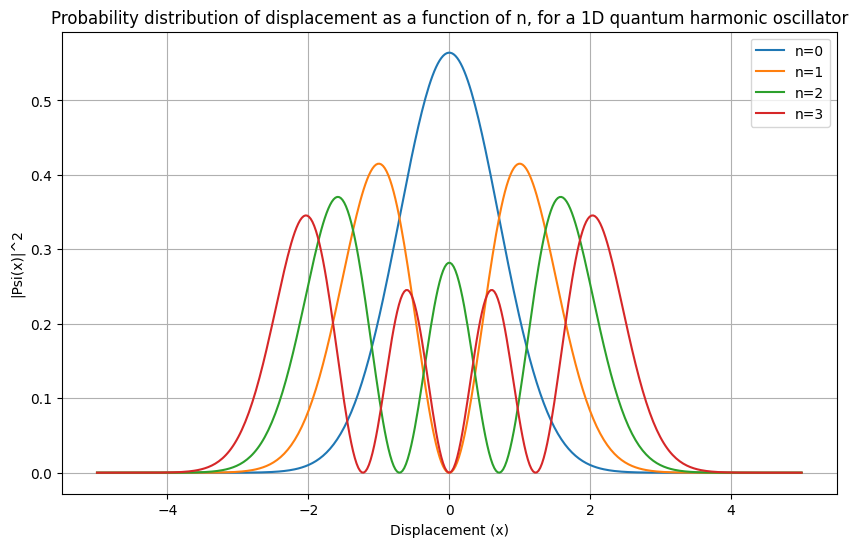

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

def calculate_wavefunction(n, x):
    '''Computing a wavefunction for a 1D quantum harmonic oscillator'''
    wavefunction = ((1 / (2**n * np.math.factorial(n)))**0.5 * (1/np.pi)**0.25) * np.exp(-x**2/2) * hermite(n)(x)
    return wavefunction


x = np.linspace(-5, 5, 400)


plt.figure(figsize=(10, 6))
for n in [0, 1, 2, 3]:
    plt.plot(x, abs(calculate_wavefunction(n, x))**2, label=f"n={n}")

plt.title('Probability distribution of displacement as a function of n, for a 1D quantum harmonic oscillator')
plt.xlabel('Displacement (x)')
plt.ylabel('|Psi(x)|^2')
plt.legend()
plt.grid(True)


B) Probability distribution of observing a certain displacement at fixed temperature for various values of $T/\Theta_{\nu}$.

$\Theta$ is the characteristic temperature. For a harmonic oscilator:

$\Theta_{\nu} = \frac{\hbar \omega}{k}$

Thus $T/\Theta_{\nu}$ is:

$T/\Theta_{\nu} = kT/\hbar \omega$

Given temperature, the occupation of the $n$-th state relative to ground state is:

$P_n \propto e^{-E_n/k_BT}$

Normalized, the probability of being in the state $n$:

$P_n = \frac{e^{-n\hbar \omega / kT}}{\sum^{\infty}_{n=0}e^{-n \hbar \omega / kT}}$

And the probability distribution for displacements along $x$ as a weighted sum over all $|\Psi_n(x)|^2$:

$P(x) = \sum_{n=0} P_n|\Psi_n(x)|^2$


/tmp/ipykernel_14655/516207607.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  wavefunction = ((1 / (2**n * np.math.factorial(n)))**0.5 * (1/np.pi)**0.25) * np.exp(-x**2/2) * hermite(n)(x)


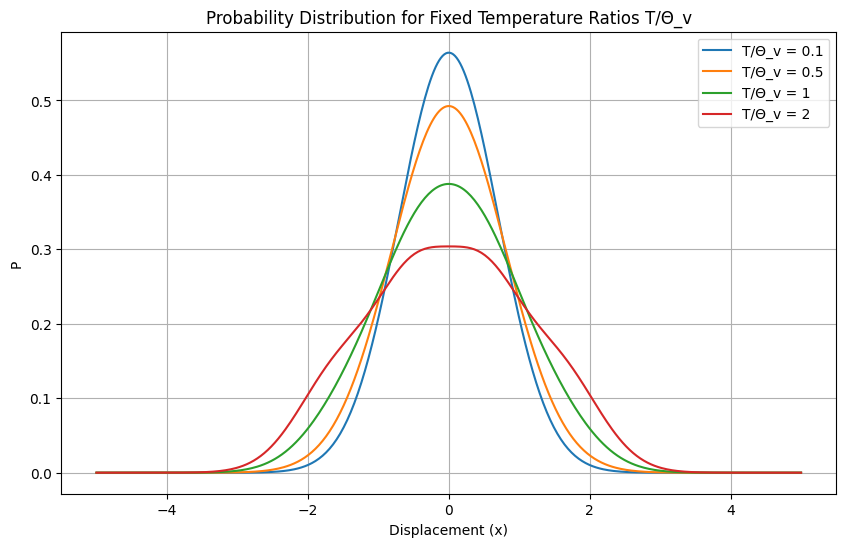

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

def calculate_wavefunction(n, x):
    '''Computing a wavefunction for a 1D quantum harmonic oscillator'''
    wavefunction = ((1 / (2**n * np.math.factorial(n)))**0.5 * (1/np.pi)**0.25) * np.exp(-x**2/2) * hermite(n)(x)
    return wavefunction

def boltzmann_distribution(n, temp_ratio):
    '''Computing boltzmann distribution of energy levels'''
    # T/Theta_v
    return np.exp(-(n + 0.5)/temp_ratio)

x = np.linspace(-5, 5, 400)

temp_ratios = [0.1, 0.5, 1, 2]

plt.figure(figsize=(10, 6))

for temp_ratio in temp_ratios:
    prob = np.zeros_like(x)
    for n in [0, 1, 2, 3]:
        weight = boltzmann_distribution(n, temp_ratio)
        prob += weight * abs(calculate_wavefunction(n, x))**2
    prob /= np.trapz(prob, x)  # Normalization
    plt.plot(x, prob, label=f'T/Θ_v = {temp_ratio}')

plt.title('Probability Distribution for Fixed Temperature Ratios T/Θ_v')
plt.xlabel('Displacement (x)')
plt.ylabel('P')
plt.legend()
plt.grid(True)


Alternative depiction for fixed energy probability distributions, with y-axis offsets, for clarity:

/tmp/ipykernel_14655/3976180146.py:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  wavefunction = ((1 / (2**n * np.math.factorial(n)))**0.5 * (1/np.pi)**0.25) * np.exp(-x**2/2) * hermite(n)(x)


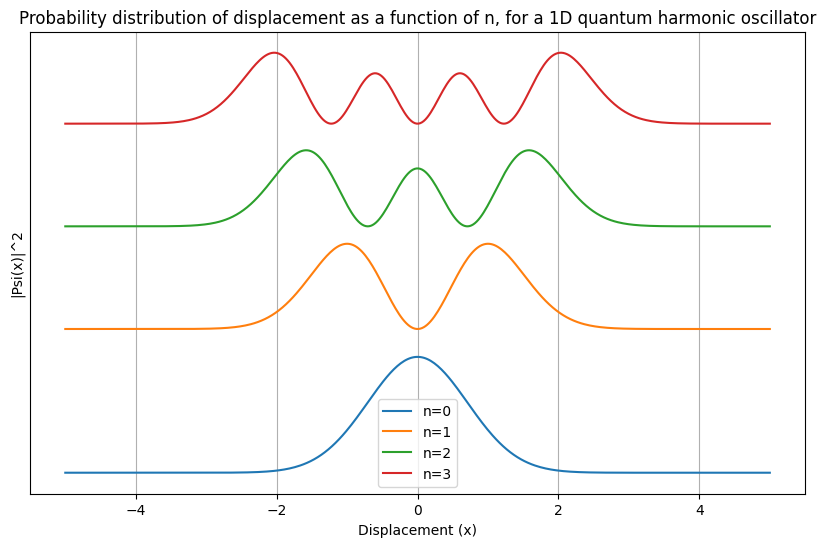

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

def calculate_wavefunction(n, x):
    '''Computing a wavefunction for a 1D quantum harmonic oscillator'''
    wavefunction = ((1 / (2**n * np.math.factorial(n)))**0.5 * (1/np.pi)**0.25) * np.exp(-x**2/2) * hermite(n)(x)
    return wavefunction

x = np.linspace(-5, 5, 400)

plt.figure(figsize=(10, 6))
offset = {0: 0, 1: 0.7, 2: 1.2, 3: 1.7}
for n in [0, 1, 2, 3]:
    plt.plot(x, abs(calculate_wavefunction(n, x))**2 + offset[n], label=f"n={n}")

plt.title('Probability distribution of displacement as a function of n, for a 1D quantum harmonic oscillator')
plt.xlabel('Displacement (x)')
plt.ylabel('|Psi(x)|^2')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()
